# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

In [2]:
! git clone https://www.github.com/Jmazher12/assignment2

fatal: destination path 'assignment2' already exists and is not an empty directory.


**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

 1. Read the abstract. What is this paper about? **This paper discusses the ways a data scientist can efficiently clean or "tidy" data, which can lead to more accurate - and fun - data analysis**
 2. Read the introduction. What is the "tidy data standard" intended to accomplish? **The "tidy data standard" is intended to provide data scientists a framework through which they can clean data. With this algorithmic approach to cleaning data, people wouldn't have to worry about figuring out where to start when it comes to cleaning data, they simply follow the tidy data standard**
 3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." **This means that messy datasets often have a unique problem that makes them messy, which therefore complicates the cleaning process for someone who has never encountered that specific problem before** What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general." **Oftentimes, having to isolate a given variable/observation in a way in which a computer can understand is difficult and frustrating, especially when as a human our brains automatically can detect a problem fairly quickly.**
 4. Read Section 2.2. How does Wickham define values, variables, and observations? **Values are defined as a collection of quantitative numbers or qualitative strings. Variables are defined as values that measure the same underlying attribute across units, such as height, temp., etc. An observation however measures all values on the same unit across attributes.**
 5. How is "Tidy Data" defined in section 2.3? **A "tidy" data set's variables will each form a column, each observation will form a row, and the type of observational unit will form a table**
 6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? **The five most common problems with messy datasets are: 1. Column headers are values and not variable names 2. Multiple variables are stoerd in one column 3. Variables are stored in both rows and columns 4. Multiple types of observational units are stored in the same table 5. A single observational unit is stored in multiple tables.** Why are the data in Table 4 messy? **The data are messy because there are variables that can be condensed into one column, rather than spread out throughout the table.** What is "melting" a dataset? **"Melting" a dataset is whenever we stack variables and observations that are redudantly placed across a table. This allows for a more condensed and easy-to-read table.**
 7. Why, specifically, is table 11 messy but table 12 tidy and "molten"? **Table 11 is messy because there is a column for each possible day in the month, which can be combined with the year and month column in order to create one condensed column. Meanwhile table 12 does this and creates a singular variable called "date". Additionally table 12 has two columns that distinct that maximum and minimum temperature on a given date, making the information more tidy and easy to understand**
 8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? **The "chicken-and-egg" problem is that if tidy data is only as useful as the tools that work with it, then tidy tools will be inextricably linked to tidy data. This means that we might find ourself spending time on organizing the tidy data tools themselves rather than the explicit data on-hand...** What does Wickham hope happens in the future with further work on the subject of data wrangling? **Wickham hopes that others will build upon this tidy data framework and design new tools/methodologies in which one can effectively organize data**

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

(30478,)
object
AxesSubplot(0.125,0.125;0.775x0.755)
float64
Total Missings: 
 181 



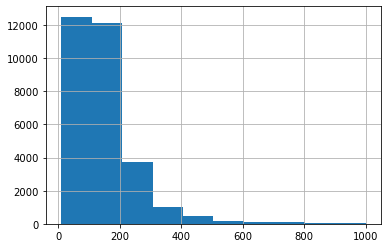

In [3]:
import numpy as np
import pandas as pd


#Q2 part 1:
df = pd.read_csv('./data/airbnb_hw.csv',low_memory=False)
print(df["Price"].shape)
print(df["Price"].dtypes)
# print(df["Price"].describe())
# print(df["Price"].hist())

# First, the commas are messing it up, so I'll need to get rid of them
# Second, "Price" is listed as an object, it should be a numeric type

df["Price"].str.replace(",","")
df["Price"] = pd.to_numeric(df["Price"], errors='coerce')


print(df["Price"].hist())
# This histogram looks significantly cleaner than the original one

print(df["Price"].dtypes)
# The "Price" variable has been correctly chagned to a float type

df["Price"+"_nan"] = df["Price"].isnull()
print("Total Missings: \n", sum(df["Price"+"_nan"]),"\n")

['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Unconfirmed'
 'Unverified' 'Invalid' 'Under investigation' 'Boating' 'Sea Disaster' nan
 'Boat' 'Boatomg'] 

Unprovoked             4716
Provoked                593
Invalid                 552
Sea Disaster            239
Watercraft              142
Boat                    109
Boating                  92
Questionable             10
Unconfirmed               1
Unverified                1
Under investigation       1
Boatomg                   1
Name: Type, dtype: int64 

Unprovoked      4716
Provoked         593
Invalid          552
Sea Disaster     239
Watercraft       142
Boat             110
Boating           92
Name: Type, dtype: int64 

Unprovoked      4716
Provoked         593
Sea Disaster     239
Watercraft       142
Boat             110
Boating           92
Name: Type, dtype: int64 

Unprovoked    4716
Provoked      1176
Name: Type, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


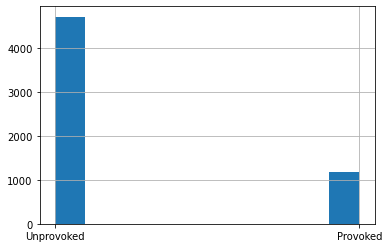

In [4]:
#Q2 part 2:
df = pd.read_csv('./data/sharks.csv', low_memory=False)
var = "Type"
print(df[var].unique(), '\n')
print(df[var].value_counts(), '\n')

# I noticed that the categories that appear 1 or 10 times means they probably aren't
# that important in the grand scheme of things, so I can just turn those into nans

df[var] = df[var].replace("Questionable", np.nan).replace("Unverified", np.nan).replace("Under investigation",np.nan).replace("Unconfirmed",np.nan)
df[var] = df[var].replace("Boatomg", "Boat")
print(df[var].value_counts(), '\n')

# When looking at the "invalid" category, I noticed that the injury was reported as being caused
# by a shark, but it was actually caused by something else like a stingray. This means that it isn't really relevant to
# whether or not a human provoked a shark or vice versa, so I can turn "invalid" into nan

df[var] = df[var].replace("Invalid", np.nan)
print(df[var].value_counts(), '\n')

# When looking at the "Sea Disaster" category, I noticed that it was reffering to incidents where a boat capsized or aggravated the sharks,
# thus I can combine this category with "Watercraft", "Boat", and "Boating" since these categories are all referring to shark attacks related to boats.
# Additionally, since boats are technically made by humans, we can say that these shark attacks were provoked because the boats were causing a disturbance
# to the sharks leading to attacks, meaning that I can classify the aforementioned categories as "Provoked"

df[var] = df[var].replace("Sea Disaster","Provoked").replace("Watercraft","Provoked").replace("Boat","Provoked").replace("Boating","Provoked")
print(df[var].value_counts(), '\n')

# Now, the "Type" column only has two categories within it, provoked and unprovoked, which makes it much simpler to understand
# whether or not the sharks were provoked or unprovoked to attack the people

print(df[var].hist())


[9 0 1]
1    19154
0     3801
9       31
Name: WhetherDefendantWasReleasedPretrial, dtype: int64
1.0    19154
0.0     3801
Name: WhetherDefendantWasReleasedPretrial, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


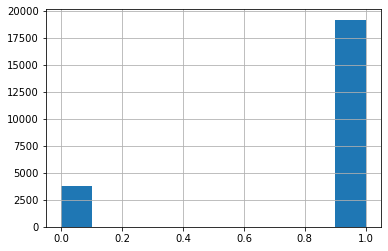

In [5]:
#Q2 part 3
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url, low_memory=False)
var = "WhetherDefendantWasReleasedPretrial"
print(df[var].unique())
print(df[var].value_counts())

# When looking at the codebook for the pretrial data, it says that the '9' means that it is unclear whether or not
# an individual was released or unreleased. Since there are only 31 of these cases, we can turn the '9' category into nans

df[var] = df[var].replace(9, np.nan)
print(df[var].value_counts(), '\n')
print(df[var].hist())

# Now we can see that more individuals have been released than unreleased


[' ' '60' '12' '.985626283367556' '36' '6' '24' '5.91375770020534' '120'
 '72' '11.9917864476386' '0' '2.95687885010267' '84' '108' '300' '240'
 '180' '4' '96' '2' '54' '.328542094455852' '44' '5' '115' '132' '48'
 '258' '34' '76' '.164271047227926' '.131416837782341' '111' '9' '3'
 '1.97125256673511' '36.9856262833676' '.0657084188911704'
 '35.4928131416838' '106.492813141684' '8' '35' '18.3141683778234' '480'
 '32' '93' '234' '732' '1.16427104722793' '4.6570841889117' '21' '7'
 '4.49281314168378' '18' '600' '43.1642710472279' '179' '52' '30' '20'
 '192' '702' '14' '55' '53' '11.9055441478439' '114' '35.0061601642711'
 '68' '.657084188911704' '46.6242299794661' '102' '65' '200' '57'
 '24.3285420944559' '12.1642710472279' '117' '81.4928131416838'
 '22.4928131416838' '1980' '3.6570841889117' '56' '10' '2.79260780287474'
 '1' '47' '22' '1500' '40' '284' '11' '118' '42' '162' '156'
 '47.2956878850103' '105' '51' '246' '29' '75' '324' '360'
 '34.4804928131417' '120.328542094456' '59.926078

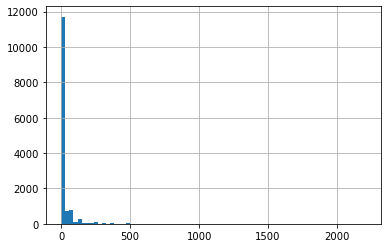

In [6]:
#Q2 part 4
df = pd.read_csv(url, low_memory=False)
var = "ImposedSentenceAllChargeInContactEvent"
print(df[var].unique(),'\n')
print(df[var].value_counts(),'\n')
# When checking the codebook, I noticed that for Sentence Types labeled 4 and 9, the data collectors left
# a blank space to indicate that lenght of the charge doesn't apply. I'll change those blanks to nans

df[var] = df[var].replace(' ', np.nan)
df[var] = pd.to_numeric(df[var], errors='coerce')

df[var].hist(bins=75)
print(df[var].describe(),'\n')
# Now we can easily make sense of the data; for example the average lenght of the sentences are around 19.8 months,
# the minimum sentence lenght is 0 - which means no incarceration - , and the maximum time spent is 2000 months

**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

(3798, 63) 

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632 

AxesSubplot(0.125,0.125;0.775x0.755) 



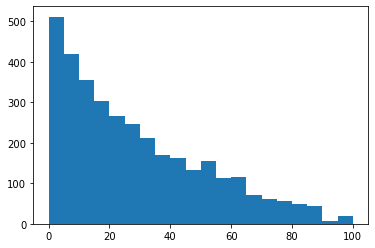

In [7]:
#Q3 part 1
df = pd.read_csv('./data/college_completion.csv', low_memory=False)
print(df.shape,'\n')
df.head()

#Q3 part 2
#The dimensions of this data are 3798 rows and 63 columns
# The variables included in the data are chronname, city, level, etc. There are 3798 observations.

#Q3 part 3
print(pd.crosstab(df['control'], df['level']),'\n')
# I can see that majority of the private not-for-profits are 4-year institutions whereas there is a more even split
# for private for-profits. Additional, there seem to be more public 2-year institutions than 4-year in this dataset

#Q3 part 4
print(df['grad_100_value'].hist(bins=20,grid=False), '\n')

AxesSubplot(0.125,0.125;0.775x0.755) 



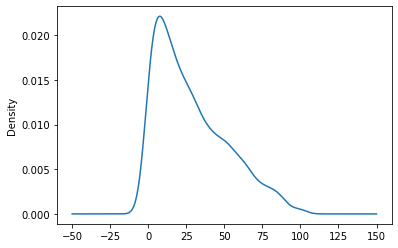

In [8]:
print(df['grad_100_value'].plot.density(), '\n')

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64 



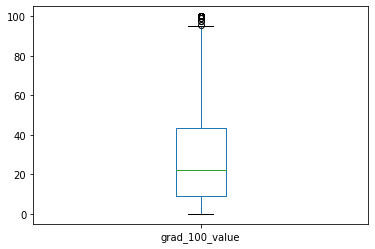

In [9]:
df['grad_100_value'].plot.box()

print(df['grad_100_value'].describe(),'\n')

control  Private for-profit  Private not-for-profit       Public
count            779.000000             1189.000000  1499.000000
mean              29.108858               41.660976    17.430887
std               25.601687               23.551231    14.729443
min                0.000000                0.000000     0.000000
25%                6.950000               25.000000     6.900000
50%               24.700000               41.000000    13.200000
75%               46.750000               58.300000    23.250000
max              100.000000              100.000000    97.800000 



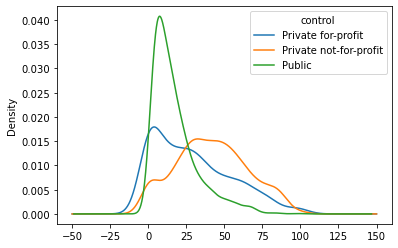

In [10]:
#Q3 part 5

group_by = 'control'
var = 'grad_100_value'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density()
print(df_wide.describe(),'\n')

level       2-year       4-year
count  1455.000000  2012.000000
mean     21.636151    33.230119
std      21.645747    23.270160
min       0.000000     0.000000
25%       6.000000    15.200000
50%      13.000000    29.700000
75%      30.600000    49.225000
max     100.000000   100.000000 



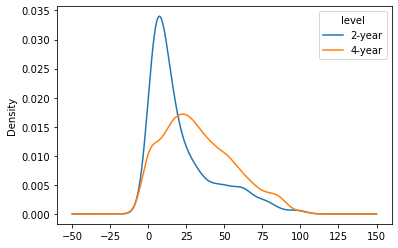

In [11]:
group_by = 'level'
var = 'grad_100_value'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density()
print(df_wide.describe(),'\n')

In [12]:
# When comparing the two grouped kernel density plots side-by-side, it appears that private non-for-profits and
# 4-year institutions have the highest graduation rates on average. This makes sense as earlier I noticed that
#the majority of private non-for-profit schools in the data are 4-year institutions.

levelXcontrol  2-year, Private for-profit  2-year, Private not-for-profit  \
count                          461.000000                       68.000000   
mean                            37.197614                       41.913235   
std                             25.497380                       28.348302   
min                              0.000000                        0.000000   
25%                             15.800000                       16.225000   
50%                             33.900000                       44.400000   
75%                             57.800000                       61.200000   
max                            100.000000                      100.000000   

levelXcontrol  2-year, Public  4-year, Private for-profit  \
count                926.0000                  318.000000   
mean                  12.4000                   17.382704   
std                   10.8936                   20.788525   
min                    0.0000                    0.000000   
2

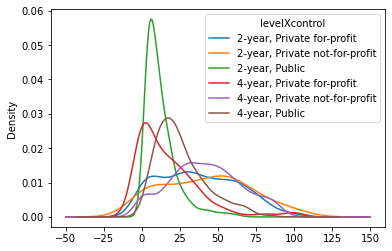

In [13]:
#Q3 part 6

df['levelXcontrol']=df['level']+', '+df['control']
group_by = 'levelXcontrol'
var = 'grad_100_value'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density()
print(df_wide.describe(),'\n')

In [14]:
# It appears that on average, 2-year private not-for-profit institutions have the highest
# graduation rate at 41.9132

AxesSubplot(0.125,0.125;0.775x0.755) 



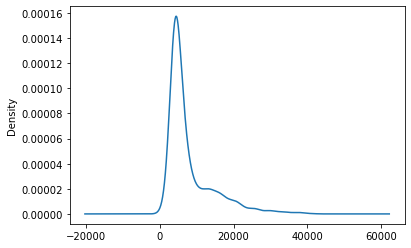

In [15]:
#Q3 part 7

print(df['aid_value'].plot.density(), '\n')

level        2-year        4-year
count   1458.000000   2339.000000
mean    4310.878601  10235.379222
std     1384.045631   7227.369167
min      294.000000    902.000000
25%     3485.500000   4830.500000
50%     4113.000000   7222.000000
75%     4890.000000  14046.000000
max    13654.000000  41580.000000 



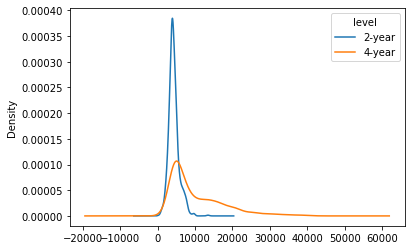

In [16]:
group_by = 'level'
var = 'aid_value'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density()
print(df_wide.describe(),'\n')

control  Private for-profit  Private not-for-profit        Public
count            991.000000             1248.000000   1558.000000
mean            4632.206862            14180.722756   5094.835687
std             1399.121259             7772.700998   2136.436370
min              294.000000              902.000000    881.000000
25%             3861.500000             8325.000000   3725.250000
50%             4331.000000            13322.000000   4667.000000
75%             5131.500000            18571.000000   6087.500000
max            18355.000000            41580.000000  17299.000000 



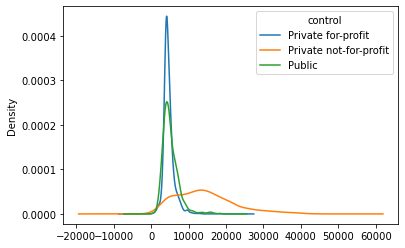

In [17]:
group_by = 'control'
var = 'aid_value'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density()
print(df_wide.describe(),'\n')

In [18]:
# When comparing the grouped kernel density plots of aid_value by level
# and control, I see that there seems to be two clusters, one from between 0 and
# 10000 and one from between 10000 and 20000. The "second cluster" is comprised mainly of
# private not-for-profit and 4-year values

# Ultimately, the data indicates that 4-year institutions and private not-for-profits give
# the most aid, which could explain why these two groups have relatively higher graduation rates as well

<AxesSubplot:xlabel='grad_100_value', ylabel='control'>

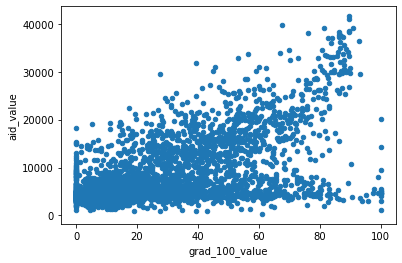

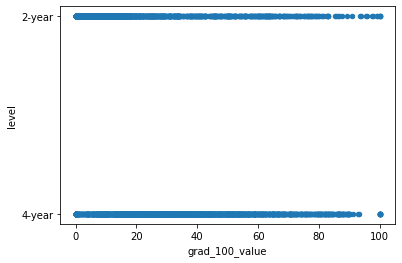

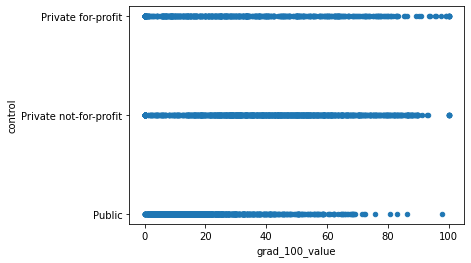

In [19]:
#Q3 part 8

df.plot.scatter(y='aid_value',x='grad_100_value')
df.plot.scatter(y='level',x='grad_100_value')
df.plot.scatter(y='control',x='grad_100_value')

In [20]:
# Based on these scatterplots, we can see that as graduation rates increase,
# the aid is increased as well

# Additionally, the areas with the most density in 2-year is lower
# on the grad_100_value axis compared to 4-year, which means that 4-year typically has
# a higher graduation rate

# The same notion applies to private not-for-profits, which has a density that is higher up
# on the grad_100_value axis compared to the other types; overall, the data supports the fact
# that private not-for-profits and 4-year institutions have the most successful graduation rates
# on average.

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [21]:
#Q4 part 1
df = pd.read_csv('./data/airbnb_hw.csv',low_memory=False)

#Q4 part 2
df.head()
print(df.shape,'\n')

# Dimensions of data are 30478 rows and 13 columns. There are 30478 observations. The variables
# include Host ID, Name, Neighbourhood, Price, etc.

#Q4 part 3
print(pd.crosstab(df['Room Type'], df['Property Type']),'\n')
# Private rooms are more common than renting entire property for
# Bed & Breakfasts, Castle, Chalet, Dorm, House, Hut, and Other

(30478, 13) 

Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   

Property Type    Loft  Other  Tent  Townhouse  Treehouse  Villa  
Room Type                                                        
Entire home/apt   392     14     0         83          0 

AxesSubplot(0.125,0.125;0.775x0.755)


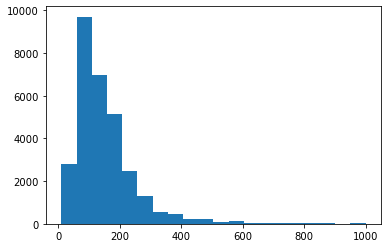

In [22]:
#Q4 part 4

var = "Price"
df[var].str.replace(",","")
df[var] = pd.to_numeric(df[var], errors='coerce')


print(df[var].hist(bins=20,grid=False))

AxesSubplot(0.125,0.125;0.775x0.755) 



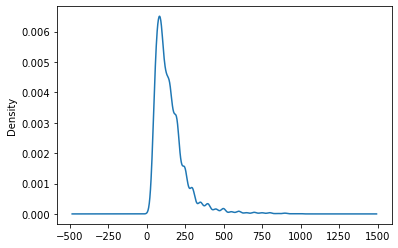

In [23]:
print(df[var].plot.density(),'\n')

AxesSubplot(0.125,0.125;0.775x0.755) 



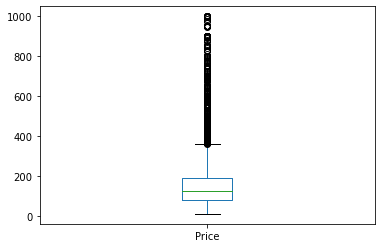

In [24]:
print(df[var].plot.box(),'\n')

In [25]:
df[var].describe()

count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64

In [26]:
# When looking at these visualizations, the data seem pretty badly scaled,
# especially the box plot which shows a lot of outliers. I need to use the natural
# log function which will hopefully smooth out the data

<AxesSubplot:>

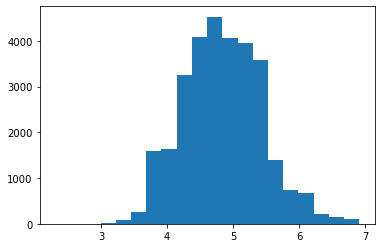

In [27]:
df['price_log'] = np.log(df[var])
df.loc[df['price_log']>0,'price_log'].hist(bins=20,grid=False)

<AxesSubplot:ylabel='Density'>

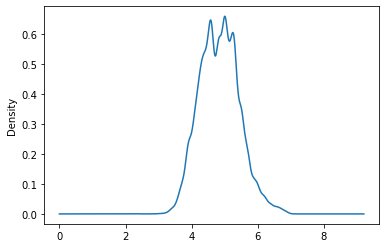

In [28]:
df['price_log'].plot.density()

<AxesSubplot:>

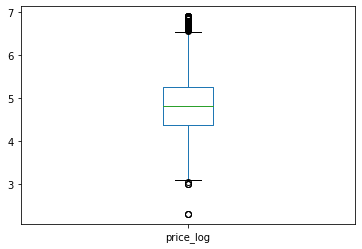

In [29]:
df['price_log'].plot.box()

In [30]:
df['price_log'].describe()

count    30297.000000
mean         4.845370
std          0.596999
min          2.302585
25%          4.382027
50%          4.828314
75%          5.257495
max          6.906755
Name: price_log, dtype: float64

In [31]:
# We can see that the data are now more smoothly represented after the log function

<AxesSubplot:xlabel='Beds', ylabel='price_log'>

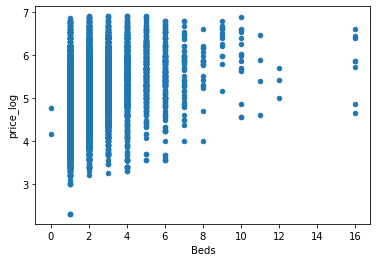

In [32]:
#Q4 part 5

df.plot.scatter(y='price_log',x='Beds')

In [33]:
# I see that in general the price increases as the number of beds
# increase. However at a certain point, for example after 10 beds, the price
# tends to not show as much correlation

In [34]:
var = 'Price'
group = 'Beds'
df.loc[:,[group,var]].groupby(group).describe()

Price                                                             
        count        mean         std    min     25%    50%     75%    max
Beds                                                                      
0.0       2.0   92.000000   38.183766   65.0   78.50   92.0  105.50  119.0
1.0   20307.0  124.757670   75.685752   10.0   75.00  100.0  155.00  950.0
2.0    6561.0  186.702332  115.044205   25.0  115.00  160.0  225.00  999.0
3.0    2029.0  234.928043  142.288189   26.0  140.00  200.0  299.00  999.0
4.0     766.0  280.554830  175.512312   27.0  150.00  240.0  363.75  999.0
5.0     274.0  322.000000  190.319415   35.0  186.00  285.0  425.00  995.0
6.0     166.0  316.313253  201.157585   35.0  183.75  271.0  399.00  900.0
7.0      45.0  341.377778  220.116631   55.0  177.00  300.0  445.00  900.0
8.0      20.0  331.850000  155.652202   55.0  218.75  339.5  408.75  750.0
9.0      14.0  587.142857  208.351721  175.0  423.75  625.0  750.00  900.0
10.0     15.0  442.200000  263.926992   95.0  287.00  400.0  650.00  975.0
11.0      4.0  332.250000  236.798613  100.0  190.00  289.5  431.75  650.0
12.0      3.0  225.000000   75.000000  150.0  187.50  225.0  262.50  300.0
16.0      8.0  402.250000  235.093143  104.0  264.25  350.0  606.25  750.0

In [35]:
# When looking at the grouped description data between price and beds, we can
# see that my original observation was right and that after the 9 bed mark, the
# prices stop increasing on average as the number of beds increase. I can also see that
# the standard deviation gets higher as the number of beds increase - except for 12 beds which
# has a surprisingly low standard deviation - which can explain why the scatterplot begins to
# show less of a correlation at the higher bed numbers

                   Price                                                     \
                   count        mean         std   min    25%    50%    75%   
Room Type                                                                     
Entire home/apt  16855.0  204.061525  116.531136  10.0  135.0  175.0  239.0   
Private room     12599.0   90.663227   47.914195  10.0   65.0   80.0  100.0   
Shared room        843.0   76.553974   65.756210  10.0   45.0   60.0   85.0   

                        
                   max  
Room Type               
Entire home/apt  999.0  
Private room     999.0  
Shared room      950.0   

                   Price                                                \
                   count        mean         std    min     25%    50%   
Property Type                                                            
Apartment        26975.0  153.863170  104.112805   10.0   85.00  129.0   
Bed & Breakfast    180.0  106.572222   84.701977   30.0   65.00   87.5   
Boa

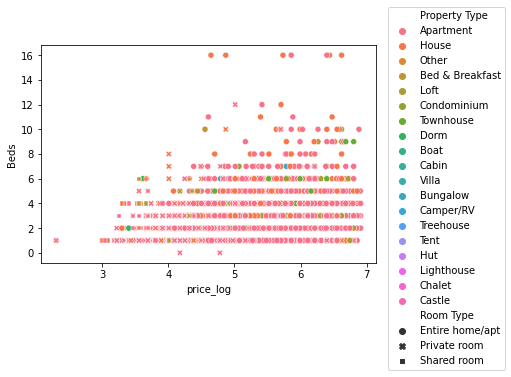

In [36]:
#Q4 part 6
import seaborn as sns

this_plot = sns.scatterplot(data=df, x='price_log', y='Beds', hue='Property Type', style='Room Type')
this_plot.legend(bbox_to_anchor=(1.4,1.2), loc='upper right')

#I notice in the scatterplot, that in general houses and apartments with the most
#beds tend to be priced higher, however after around 9 beds, the values become sparsely
#located at any price. Additionally, majority of the properties with the most beds are
#entire home/apts.

var = 'Price'
group = 'Room Type'
print(df.loc[:,[group,var]].groupby(group).describe(),'\n')

group = 'Property Type'
print(df.loc[:,[group,var]].groupby(group).describe(),'\n')

#When grouping prices and room type, I see that entire home/apts have the highest average
#price as well as the highest standard deviation; Meanwhile, when grouping prices and property type, I see that condominiums have the
#highest avearge price and the property type "other" has the highest standard deviation. However other could be a multitude of properties,
#so it would be better to say that condominiums also have the highest standard deviation beside the "other" category. Due to the extreme
#deviations of each of these respective categories, I would argue that the median would be the more reliable estimate of central tendency
#in this case because it is less affected by outliers, which greatly affect the mean. Thus the data would be better served if we measured
#by the middle value of the data rather than the average.

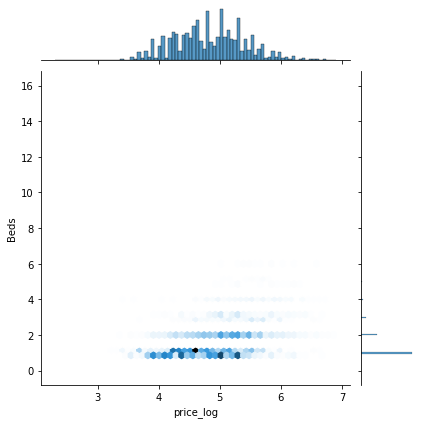

In [37]:
#Q4 part 7

sns.jointplot(x='price_log',y='Beds', data=df, kind='hex')
#Based on the results of the jointplot, the data is actually distributed relatively bottom-heavy on the beds side
#and more centrally on the price side with majority of the beds between 1 and 4 and prices between the values 4 and 5. 
#I can see how the plot from part 6 can be misleading because that plot makes it look like the average price and number
#of beds are higher than they actually are.

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

In [38]:
#Q5 part 1
# The most recent US Census gathered data on race by sending out questionaires,
# surveys, and phone calls to households across the U.S. The categories included White, Black,
# Asian, Latino, and Other.

#Q5 part 2
# We gather these data because they are vital to understanding the status quo of America's demographic.
# This plays a huge role in politics and society because different demographic shifts indicate cultural 
# shifts as well, which directly influences America's socioeconomic structures and political preferences. 
# Data quality matters greatly here because the aforementioned topics can only be represented faithfully if 
# the data about race demographics is accurate.

#Q5 part 3
# The primary problem that I see in how the Census was constructed is non-response bias and voluntary bias.
# There's a high chance that a lot of registered households don't check their mail, pick up phone calls, or 
# really even care enough to fill out the Census information in the first place. This misconstrues the data as 
# it won't be very representational of all the households that don't fill out the survey. I think that making the
# Census information mandatory would greatly increase the chance that households fill out the information. Similar 
# to how households have to file taxes, if the U.S. Census can be a mandatory requirement then I'm sure the data 
# would be significantly more representative of the U.S. population. Of course, this is easier said than done but 
# if implemented, the data collection process would be much more refined and more importantly accurate. In terms 
# of diversity, I would recommend getting rid of the race boxes altogether. Rather than selecting a race from the 
# options given, should have the respondents fill out their race by writing it in themselves. This would more accurately
# reflect the diversity of the U.S.

#Q5 part 4
# The Census gathered data on sex by having a binary sex question on their survey asking about respondents assigned gender
# at birth. According to ChatGPT, the Census DID NOT ask any gender identifying questions. I personally think that this was
# the correct thing to do in this situation because gender is more of a personal identification question whereas asking 
# about assigned sex at birth is an objective statistic.

#Q5 part 5
# Concerns that I have about collecting data on categories like gender or sexual identiy is that they can be classified as peronsal,
# so respondents can find the question itself to be insensitive. However, I feel like having the 'Choose not to say' option,
# is detrimental to the data collection process as that will create a lot of missing values. The more missing vales, the less,
# the data sample represents the true population. I believe practices to adopt is to drop personal identification questions
# entirely and focus on objective demographic information such as age, weight, housing, etc.

#Q5 part 6
# Concerns I would have for such an algorithm is that the responses would be too varied to categorize. Having responses
# be filtered through a program to be selected in an overarching category would defeat the pupose of having a personal
# and protected characteristic

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

In [44]:
#Q6 part 1


FileNotFoundError: [Errno 2] No such file or directory: './assignment2/data/CBO_data.csv'